# EXPLORATORY DATA ANALYSIS

IMPORTING THE DATA AND PERFORMING INITIAL CLEANUP

In [1]:
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
data_set = load_dataset('lukebarousse/data_jobs')
df= data_set['train'].to_pandas()

# Cleaning Up Data
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

FILTERING FOR DATA ANALYST JOBS IN INDIA

In [2]:
df_DA_India = df[(df['job_title_short']== 'Data Analyst')&(df['job_country']=='India')].copy()

In [3]:
df_plot = df_DA_India['job_location'].value_counts().to_frame().head(10)
# it is evident that for 2056 job postings the job location is not accurate hence removing it

In [4]:
print(df_plot.index) 

Index(['India', 'Hyderabad, Telangana, India', 'Anywhere',
       'Bengaluru, Karnataka, India', 'Maharashtra, India',
       'Mumbai, Maharashtra, India', 'Pune, Maharashtra, India',
       'Gurugram, Haryana, India', 'Chennai, Tamil Nadu, India',
       'Secunderabad, Telangana, India'],
      dtype='object', name='job_location')


In [5]:
df_plot = df_plot.drop(index=['India'])
df_plot

,count
job_location,
"Hyderabad, Telangana, India",1289
Anywhere,1052
"Bengaluru, Karnataka, India",355
"Maharashtra, India",203
"Mumbai, Maharashtra, India",133
"Pune, Maharashtra, India",119
"Gurugram, Haryana, India",108
"Chennai, Tamil Nadu, India",106
"Secunderabad, Telangana, India",84


PLOTTING FROM THE ARRIVED DATAFRAME

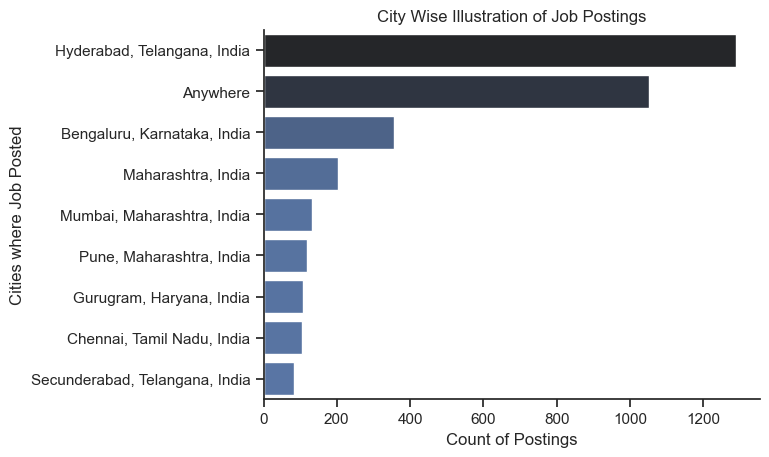

In [6]:
import seaborn as sns
sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='count',y='job_location',hue='count',palette='dark:b_r',legend=False)
plt.xlabel('Count of Postings')
plt.ylabel('Cities where Job Posted')
plt.title('City Wise Illustration of Job Postings')
sns.despine()
plt.show()

NOW CREATING A PIE CHART TO SEEK TRENDS IN TYPE OF JOB i.e. WFH OR ON-SITE/OFFICE BASED, DEGREE REQUIREMENTS AND INSURANCE OFFERED

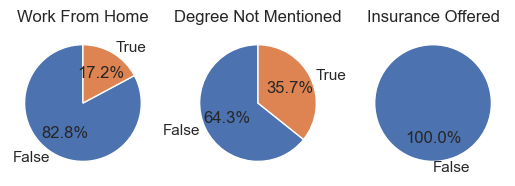

In [7]:
fig , ax = plt.subplots(1,3)

dict_pie = {
    'job_work_from_home':'Work From Home',
    'job_no_degree_mention':'Degree Not Mentioned',
    'job_health_insurance': 'Insurance Offered'}

#for i, (column,title) in enumerate(dict_pie.items()):
    #ax[i].pie(df_DA_India[column].value_counts(),startangle=90, autopct='%1.1f%%',labels=column.index)
    #ax[i].set_title(title)

for i, (column, title) in enumerate(dict_pie.items()):
    counts = df_DA_India[column].value_counts()
    ax[i].pie(counts, startangle=90, autopct='%1.1f%%', labels=counts.index)
    ax[i].set_title(title)



     
plt.show()    

CREATING A BAR CHART TO ANALYSE COMPANIES WHICH ARE HIRING REGULARY FOR DATA ANALYST JOBS


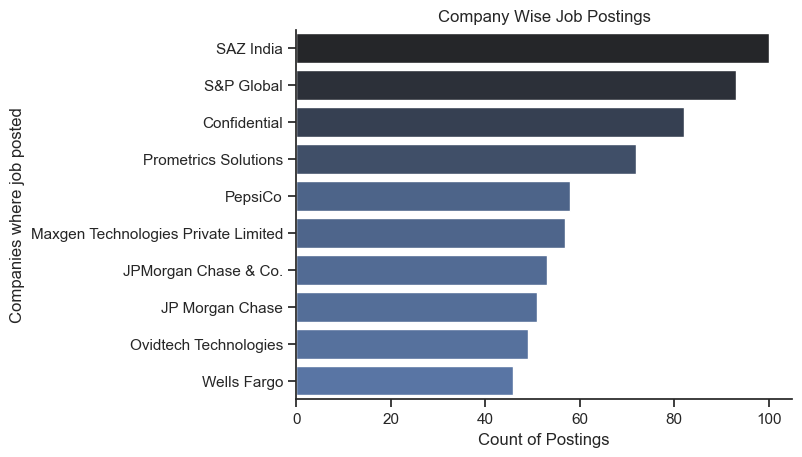

In [10]:
df_plot = df_DA_India['company_name'].value_counts().to_frame().head(10)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='count',y='company_name',hue='count',palette='dark:b_r',legend=False)
plt.xlabel('Count of Postings')
plt.ylabel('Companies where job posted')
plt.title('Company Wise Job Postings')
sns.despine()
plt.show()

In [17]:
df_DA_India.value_counts('company_name').head(10)
# TO PROVIDE ACCURATE NUMBERS

company_name
SAZ India                              100
S&P Global                              93
Confidential                            82
Prometrics Solutions                    72
PepsiCo                                 58
Maxgen Technologies Private Limited     57
JPMorgan Chase & Co.                    53
JP Morgan Chase                         51
Ovidtech Technologies                   49
Wells Fargo                             46
Name: count, dtype: int64